# Lab 3 (Part 1)

#### Practise to create choropleth map using different color classification methods

# 1. Reading and Processing Data

Import all packages needed

In [71]:
import mapclassify as mc
import libpysal
import geopandas as gpd
import matplotlib.pyplot as plt

# enable inline plotting (may not be neccesary in jupyter notebook)
%matplotlib inline 

#set default plotting size
plt.rcParams['figure.figsize'] = [15, 12]

`libpysal` is an supplimentary package of `pysal`, which include many useful datasets for spatial analysis

Get the file path of the shapefile `south.shp` from libpysal.

In [4]:
fpath = libpysal.examples.get_path('south.shp')

You can print df to see what it is

In [5]:
print(fpath)

C:\ProgramData\Anaconda3\lib\site-packages\libpysal\examples\south\south.shp


Read the shapefile using the path. The shapefile is read into `df` as a geodataframe object.

In [6]:
df = gpd.read_file(fpath)

Print the object type of `df`

In [7]:
type(df)

geopandas.geodataframe.GeoDataFrame

Print the first 5 rows

In [8]:
df.head()

,FIPSNO,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,54029,Hancock,West Virginia,54,029,54029,54,29,1,1.682864,...,2.557262,0.223645,0.295377,0.332251,0.363934,9.981297,7.8,9.785797,12.604552,"POLYGON ((-80.6280517578125 40.39815902709961,..."
1,54009,Brooke,West Virginia,54,009,54009,54,9,1,4.607233,...,0.748370,0.220407,0.318453,0.314165,0.350569,10.929337,8.0,10.214990,11.242293,POLYGON ((-80.52625274658203 40.16244888305664...
2,54069,Ohio,West Virginia,54,069,54069,54,69,1,0.974132,...,3.310334,0.272398,0.358454,0.376963,0.390534,15.621643,12.9,14.716681,17.574021,POLYGON ((-80.52516937255859 40.02275085449219...
3,54051,Marshall,West Virginia,54,051,54051,54,51,1,0.876248,...,0.546097,0.227647,0.319580,0.320953,0.377346,11.962834,8.8,8.803253,13.564159,POLYGON ((-80.52446746826172 39.72112655639648...
4,10003,New Castle,Delaware,10,003,10003,10,3,1,4.228385,...,16.480294,0.256106,0.329678,0.365830,0.332703,12.035714,10.7,15.169480,16.380903,POLYGON ((-75.77269744873047 39.38300704956055...


**Meanings of the attributes**

| Variable | Description |
| :---        | :---       |
|NAME|	county name|
|STATE_NAME|	state name|
|STATE_FIPS|	state fips code (character)|
|CNTY_FIPS|	county fips code (character)|
|FIPS|	combined state and county fips code (character)|
|STFIPS|	state fips code (numeric)|
|COFIPS|	county fips code (numeric)|
|FIPSNO|	fips code as numeric variable|
|SOUTH|	dummy variable for Southern counties (South = 1)|
|HR**|	homicide rate per 100,000 (1960, 1970, 1980, 1990)|
|HC**|	homicide count, three year average centered on 1960, 1970, 1980, 1990|
|PO**|	county population, 1960, 1970, 1980, 1990|
|RD**|	resource deprivation 1960, 1970, 1980, 1990 (principal component, see Codebook for details)|
|PS**|	population structure 1960, 1970, 1980, 1990 (principal component, see Codebook for details)|
|UE**|	unemployment rate 1960, 1970, 1980, 1990|
|DV**|	divorce rate 1960, 1970, 1980, 1990 (% males over 14 divorced)|
|MA**|	median age 1960, 1970, 1980, 1990|
|POL**|	log of population 1960, 1970, 1980, 1990|
|DNL**|	log of population density 1960, 1970, 1980, 1990|
|MFIL**|	log of median family income 1960, 1970, 1980, 1990|
|FP**|	% families below poverty 1960, 1970, 1980, 1990 (see Codebook for details)|
|BLK**|	% black 1960, 1970, 1980, 1990|
|GI**|	Gini index of family income inequality 1960, 1970, 1980, 1990|
|FH**|	% female headed households 1960, 1970, 1980, 1990|

source: https://geodacenter.github.io/data-and-lab/south/

# 2. Examining Data Distributin in Histogram

In [9]:
df.columns

Index(['FIPSNO', 'NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS',
       'STFIPS', 'COFIPS', 'SOUTH', 'HR60', 'HR70', 'HR80', 'HR90', 'HC60',
       'HC70', 'HC80', 'HC90', 'PO60', 'PO70', 'PO80', 'PO90', 'RD60', 'RD70',
       'RD80', 'RD90', 'PS60', 'PS70', 'PS80', 'PS90', 'UE60', 'UE70', 'UE80',
       'UE90', 'DV60', 'DV70', 'DV80', 'DV90', 'MA60', 'MA70', 'MA80', 'MA90',
       'POL60', 'POL70', 'POL80', 'POL90', 'DNL60', 'DNL70', 'DNL80', 'DNL90',
       'MFIL59', 'MFIL69', 'MFIL79', 'MFIL89', 'FP59', 'FP69', 'FP79', 'FP89',
       'BLK60', 'BLK70', 'BLK80', 'BLK90', 'GI59', 'GI69', 'GI79', 'GI89',
       'FH60', 'FH70', 'FH80', 'FH90', 'geometry'],
      dtype='object')

Check the distribution of `HR90` (homicide count in 1990). The histogram provides information for select color classification methods. 

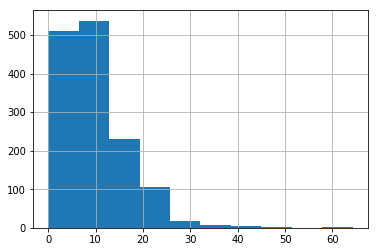

In [10]:
df['HR90'].hist()

Increase the bin number

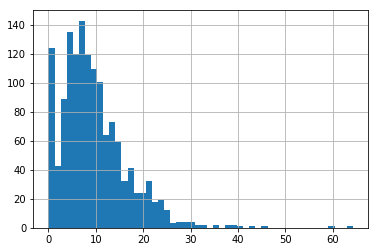

In [11]:
df['HR90'].hist(bins=50)

# 3. Color Classification of Choropleth Maps

### Equal Interval Classification

First, we plot the map using the equal interval classification.

In [12]:
hr90_eq10 = mc.Equal_Interval(df['HR90'], k=10)

In [13]:
# print to see the classification
hr90_eq10 

              Equal Interval             
 
Lower            Upper              Count
         x[i] <=  6.426               511
 6.426 < x[i] <= 12.852               537
12.852 < x[i] <= 19.278               229
19.278 < x[i] <= 25.704               105
25.704 < x[i] <= 32.130                17
32.130 < x[i] <= 38.557                 6
38.557 < x[i] <= 44.983                 4
44.983 < x[i] <= 51.409                 1
51.409 < x[i] <= 57.835                 0
57.835 < x[i] <= 64.261                 2

Print the color levels, which are integers.

In [14]:
hr90_eq10.yb

array([0, 0, 0, ..., 0, 0, 0])

Next, we create a new column `cl_eq10` in `df` to store the class levels in `hr90_eq10`

In [15]:
df['cl_eq10'] = hr90_eq10.yb

In [16]:
# Print the first 5 rows of df
df.head()

,FIPSNO,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,SOUTH,HR60,...,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry,cl_eq10
0,54029,Hancock,West Virginia,54,029,54029,54,29,1,1.682864,...,0.223645,0.295377,0.332251,0.363934,9.981297,7.8,9.785797,12.604552,"POLYGON ((-80.6280517578125 40.39815902709961,...",0
1,54009,Brooke,West Virginia,54,009,54009,54,9,1,4.607233,...,0.220407,0.318453,0.314165,0.350569,10.929337,8.0,10.214990,11.242293,POLYGON ((-80.52625274658203 40.16244888305664...,0
2,54069,Ohio,West Virginia,54,069,54069,54,69,1,0.974132,...,0.272398,0.358454,0.376963,0.390534,15.621643,12.9,14.716681,17.574021,POLYGON ((-80.52516937255859 40.02275085449219...,0
3,54051,Marshall,West Virginia,54,051,54051,54,51,1,0.876248,...,0.227647,0.319580,0.320953,0.377346,11.962834,8.8,8.803253,13.564159,POLYGON ((-80.52446746826172 39.72112655639648...,0
4,10003,New Castle,Delaware,10,003,10003,10,3,1,4.228385,...,0.256106,0.329678,0.365830,0.332703,12.035714,10.7,15.169480,16.380903,POLYGON ((-75.77269744873047 39.38300704956055...,1


The following code means assigning colors to the counties using the column cl_eq10, which stores the class levels.

Play around the parameters to see how the map changes

Text(0.5, 1.0, 'Homicide Rate 1990 in Equal Intervals')

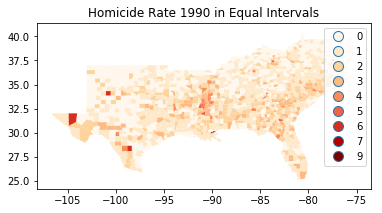

In [17]:
df.plot(column='cl_eq10', categorical=True, \
                              cmap='OrRd', linewidth=0.01, \
                              edgecolor='white', legend=True)

plt.title('Homicide Rate 1990 in Equal Intervals') #add the title to the map
# plt.savefig('hr90q10.png')

You can change the parameters to see how the map changes.

- `categorical = True` means the legend is arranged in different levels

- `cmap = 'OrRd` means that the use the `OrRd` color scheme, which is a sequential color scheme. Click [here](https://matplotlib.org/tutorials/colors/colormaps.html) for other color schemes.

- `linewidth = 0.1` is used to set the boldness of the outlines of polygons.

- `edgecolor` controls the color of the outlines



### Quantile Classification

We will break the attribute `HR90` into classes to assign color levels

We first classify the values into quantiles. The parameter `k` controls the number of quantiles you create. If it's 10, then every class spans 10%.

Note, the number of features (counties) in each class is equal (except the first and last one)

In [18]:
hr90_q10 = mc.Quantiles(df['HR90'], k=10)
# print to see the classification
hr90_q10

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


                Quantiles                
 
Lower            Upper              Count
         x[i] <=  2.048               142
 2.048 < x[i] <=  4.180               141
 4.180 < x[i] <=  5.511               141
 5.511 < x[i] <=  6.904               141
 6.904 < x[i] <=  8.221               141
 8.221 < x[i] <=  9.783               141
 9.783 < x[i] <= 11.640               141
11.640 < x[i] <= 14.278               141
14.278 < x[i] <= 18.767               141
18.767 < x[i] <= 64.261               142

`mc.Quantiles` assigns a class level (1,2,3... 10) to each county in the dataset

The assigned classes are stored in the `yb` property of the classification object `hr90_q10`. 

In [19]:
# Print to see the classes of the counties, which is stored in an numpy array
hr90_q10.yb

array([0, 0, 1, ..., 1, 2, 1])

If `k` is 5, every class spans 20%

In [20]:
hr90_q20 = mc.Quantiles(df['HR90'], k=5)
# print to see the classification
hr90_q20

                Quantiles                
 
Lower            Upper              Count
         x[i] <=  4.180               283
 4.180 < x[i] <=  6.904               282
 6.904 < x[i] <=  9.783               282
 9.783 < x[i] <= 14.278               282
14.278 < x[i] <= 64.261               283

Next, we create a new column `cl` in `df` to store the class levels in `hr90_q10`

In [21]:
df['cl_q10'] = hr90_q10.yb

The following code means assigning colors to the counties using the column `cl_q10`, which stores the class levels.

Play around the parameters to see how the map changes

Text(0.5, 1.0, 'HR90 Quantiles')

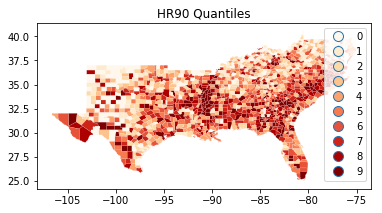

In [22]:
df.plot(column='cl_q10', categorical=True, \
                              cmap='OrRd', linewidth=0.1, \
                              edgecolor='white', legend=True)

plt.title('HR90 Quantiles') #add the title to the map
# plt.savefig('hr90q10.png')

### Natural Break (Fisher Jenks) Classification

Next, we create a choropleth map using the natural break (Fisher Jenks) classification method.

Break the attribute `HR90` into 10 classes using natural break classification.

In [23]:
hr90_fj10 = mc.Fisher_Jenks(df['HR90'], k=10)
hr90_fj10

               Fisher_Jenks              
 
Lower            Upper              Count
         x[i] <=  2.298               152
 2.298 < x[i] <=  5.789               309
 5.789 < x[i] <=  8.771               298
 8.771 < x[i] <= 12.027               250
12.027 < x[i] <= 15.806               182
15.806 < x[i] <= 20.209               109
20.209 < x[i] <= 25.780                83
25.780 < x[i] <= 33.095                18
33.095 < x[i] <= 45.636                 9
45.636 < x[i] <= 64.261                 2

In [24]:
# add the class levels as a new column to the df
df['cl_fj10'] = hr90_fj10.yb

In [25]:
df.head()

,FIPSNO,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,SOUTH,HR60,...,GI79,GI89,FH60,FH70,FH80,FH90,geometry,cl_eq10,cl_q10,cl_fj10
0,54029,Hancock,West Virginia,54,029,54029,54,29,1,1.682864,...,0.332251,0.363934,9.981297,7.8,9.785797,12.604552,"POLYGON ((-80.6280517578125 40.39815902709961,...",0,0,0
1,54009,Brooke,West Virginia,54,009,54009,54,9,1,4.607233,...,0.314165,0.350569,10.929337,8.0,10.214990,11.242293,POLYGON ((-80.52625274658203 40.16244888305664...,0,0,0
2,54069,Ohio,West Virginia,54,069,54069,54,69,1,0.974132,...,0.376963,0.390534,15.621643,12.9,14.716681,17.574021,POLYGON ((-80.52516937255859 40.02275085449219...,0,1,1
3,54051,Marshall,West Virginia,54,051,54051,54,51,1,0.876248,...,0.320953,0.377346,11.962834,8.8,8.803253,13.564159,POLYGON ((-80.52446746826172 39.72112655639648...,0,2,1
4,10003,New Castle,Delaware,10,003,10003,10,3,1,4.228385,...,0.365830,0.332703,12.035714,10.7,15.169480,16.380903,POLYGON ((-75.77269744873047 39.38300704956055...,1,3,2


Text(0.5, 1.0, 'HR90 Fisher-Jenks')

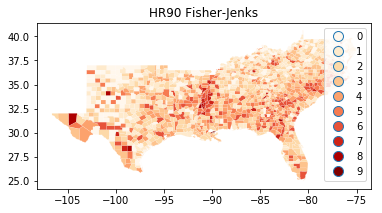

In [26]:
df.plot(column='cl_fj10', categorical=True, \
                              k=10, cmap='OrRd', linewidth=0.1, \
                              edgecolor='white', legend=True)
plt.title('HR90 Fisher-Jenks')
# plt.savefig('hr90fj10.png')

___

# Lab 3 (Part 1)

#### The following questions are the first part of Lab 3. Please copy and paste your code, screenshot and answers to a PDF or MS Word file.

#### Please submit the answers together with Part 2 which will be released on Thursday.

#### Due date: Feb 21 (Wednesday)

# Question 1

Please refer to the above instructions and the [manual](https://mapclassify.readthedocs.io/en/latest/generated/mapclassify.Std_Mean.html#mapclassify.Std_Mean) of `mapclassify` to create a choropleth map using the mean and standard deviation method.

Please use a diverging color scheme to denote counties where the homicide rates are positively and negatively deviated from the mean. You can find names of color schemes from [here](https://matplotlib.org/tutorials/colors/colormaps.html)

**Please submit a screenshot of the created map and the code**

# Answer to Q1
You would need to run all cells above in order to run the answer code.

You can do this by clicking **Run All Above** in the **Cell** menu

![alt_text](images/fig10.jpg)

In [29]:
# Break the values in to classes
hr90_std1 = mc.Std_Mean(df['HR90'], multiples=[-2, -1, 1, 2])
# Print the classes
hr90_std1

                 Std_Mean                 
 
Lower            Upper               Count
         x[i] <= -4.528                  0
-4.528 < x[i] <=  2.510                164
 2.510 < x[i] <= 16.588               1046
16.588 < x[i] <= 23.627                151
23.627 < x[i] <= 64.261                 51

In [44]:
import numpy as np
np.unique(hr90_std1.yb)

array([1, 2, 3, 4])

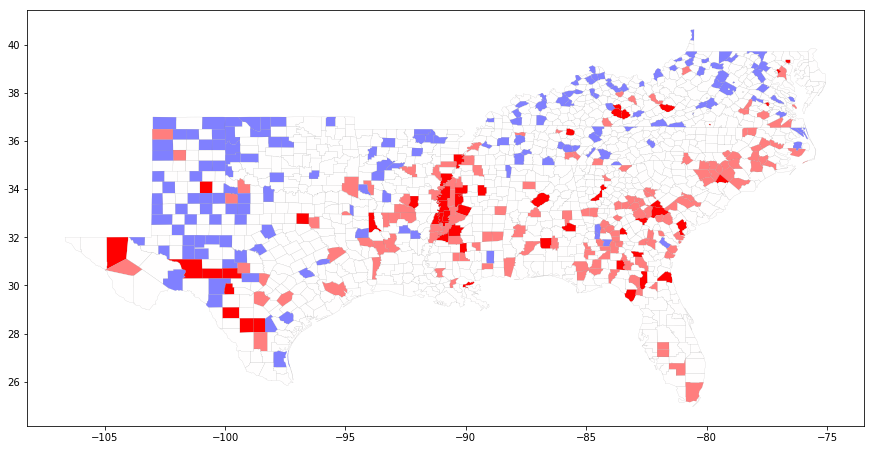

In [79]:
# Create an empty canvas for plotting
f, ax = plt.subplots(1)

# Add a new column 'cl_std1' to store the class numbers
df['cl_std1'] = hr90_std1.yb

# plot the map using the 'cl_std1' column, using a diverging colour scheme 'bwr'
df.plot(column='cl_std1', categorical=True, \
                              cmap='bwr', linewidth=0.1, axes = ax,\
                                vmin=-1, vmax=3,
                              edgecolor='gray')


# Question 2
Compare the four maps (equal interval, quantile, natural breaks and standard deviation-mean) and briefly discuss their difference. Which classification do you think is most apprepriate for the homicide data i.e. (`HR90`).

**Submit your answer**

# Answer to Question 2

_The following answer is just for your reference._

In the map with **equal interval classification**, most areas have a lighter color, as most counties have a low homicide rate, which are assigned in the same classes (see the the peak of the histogram is to the left). Although the high rate counties are well distinguished, the large number of counties with a low homicide rate are using one or two color levels.

In the **quantile classification**, each group has an equal number number of counties, regardless of the actual values of homicde rate. The color levels represent the order of the counties in homicide rate instead of the actual values. In this dataset, counties with low homicide rates are well differentiated. Counties with relatively high rates, although the actual values are different, are grouped into the same classes.

**Natural break** is more flexible and adaptive. It can intelligently assign color according to the data distribution. Thus, both low value counties and high value counties are well differentiated. However, there is no regularity about the class assignment. 

**Standard deviation** can highlight counties deviated from the mean of the distribution. As the distribution is skewed to the left (lots of low rate counties), it better differentiate the high value counties than the low value counties.

# Question 3
Please write code to display the counties where HR90 is greater than 30 on top of the boundaries of other counties. The map should look like below (colors do not need to be the same).

Hint 1: Consider the county with the highest HR90 and the choropleth map as two layers. You display the selected county on top of the choropleth map. You have plotted multiple layers in Lab 2.

Hint 2: You have done similar task in Lab 2, in which you displayed the crime points on top of the census tracts in Oahu.

**Submit your code**


![alt text](images/fig3.JPG)


# Answer to Question 3
Please write code to display the counties where HR90 is greater than 30 on top of the boundaries of other counties. The map should look like below (colors do not need to be the same).

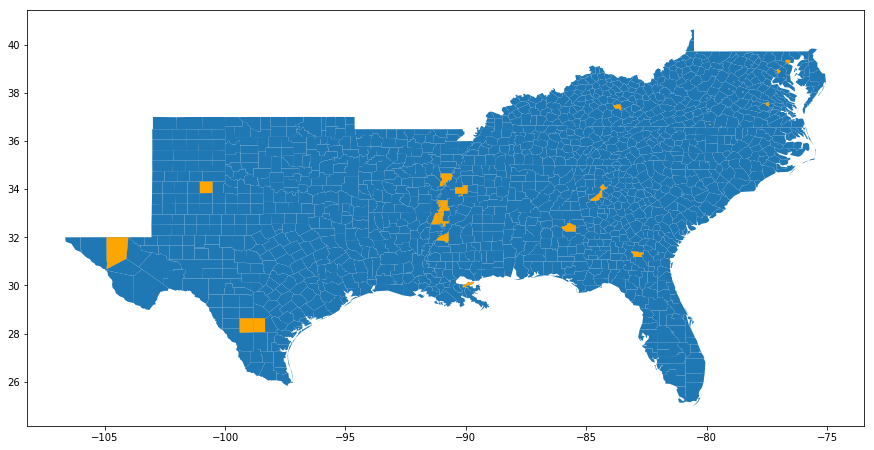

In [81]:
bk = df.plot()

df2=df[df['HR90']>30]
df2.plot(ax=bk,color='orange')
